<a href="https://colab.research.google.com/github/prideven/MachineLearning/blob/main/KMeans_1st_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [8]:
url='https://drive.google.com/uc?id=1ZM1jcWKEKjHTUCm_QgWM2n-o2yKfduE8'
output= "data.csv"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZM1jcWKEKjHTUCm_QgWM2n-o2yKfduE8
To: /content/data.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 8.08MB/s]


'data.csv'

In [26]:
import csv
df = pd.read_csv('data.csv')

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
pearsoncorr=df.corr()

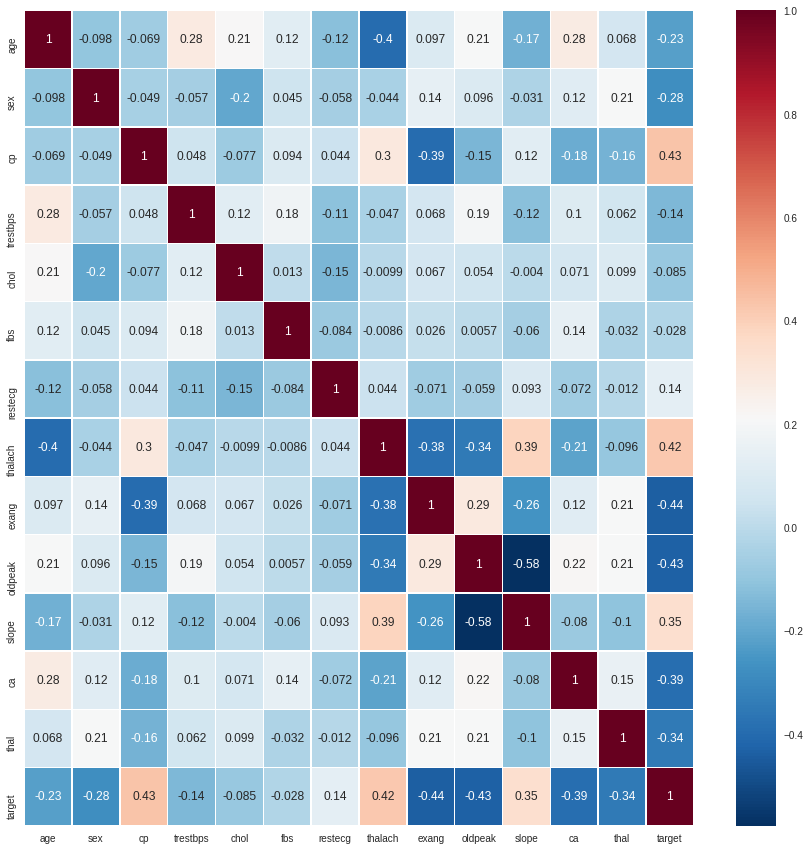

In [29]:

import seaborn as sb

plt.figure(1,figsize=(15,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [51]:
le = preprocessing.LabelEncoder()

labelencoderlist=['age','thal']

In [53]:
le.fit(df.age)
df.stars=le.transform(df.age)
le.fit(df.thal)
df.Open24Hours=le.transform(df.thal)

In [54]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

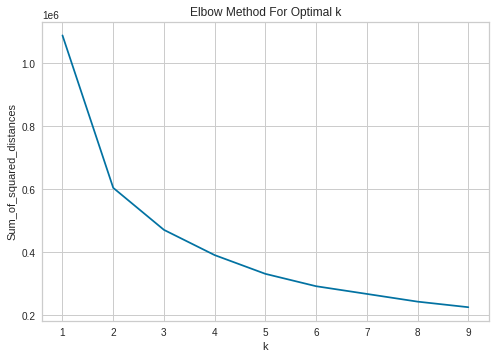

In [55]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

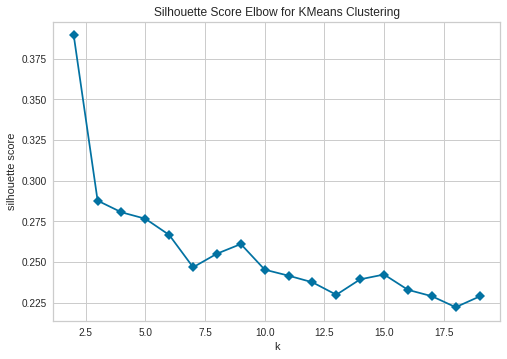

In [56]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

visualizer.fit(df)    
visualizer.poof() 


In [57]:
df2 = df[['age','thal']]
kmeans = KMeans(n_clusters=2)
y = kmeans.fit_predict(df)
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [58]:
kmeans.cluster_centers_

array([[5.30621762e+01, 7.40932642e-01, 1.05181347e+00, 1.29746114e+02,
        2.16259067e+02, 1.55440415e-01, 5.75129534e-01, 1.51818653e+02,
        2.84974093e-01, 9.73575130e-01, 1.40932642e+00, 6.68393782e-01,
        2.25906736e+00, 5.95854922e-01],
       [5.66545455e+01, 5.81818182e-01, 8.18181818e-01, 1.34918182e+02,
        2.98909091e+02, 1.36363636e-01, 4.45454545e-01, 1.45836364e+02,
        4.00000000e-01, 1.15545455e+00, 1.38181818e+00, 8.36363636e-01,
        2.40909091e+00, 4.54545455e-01]])

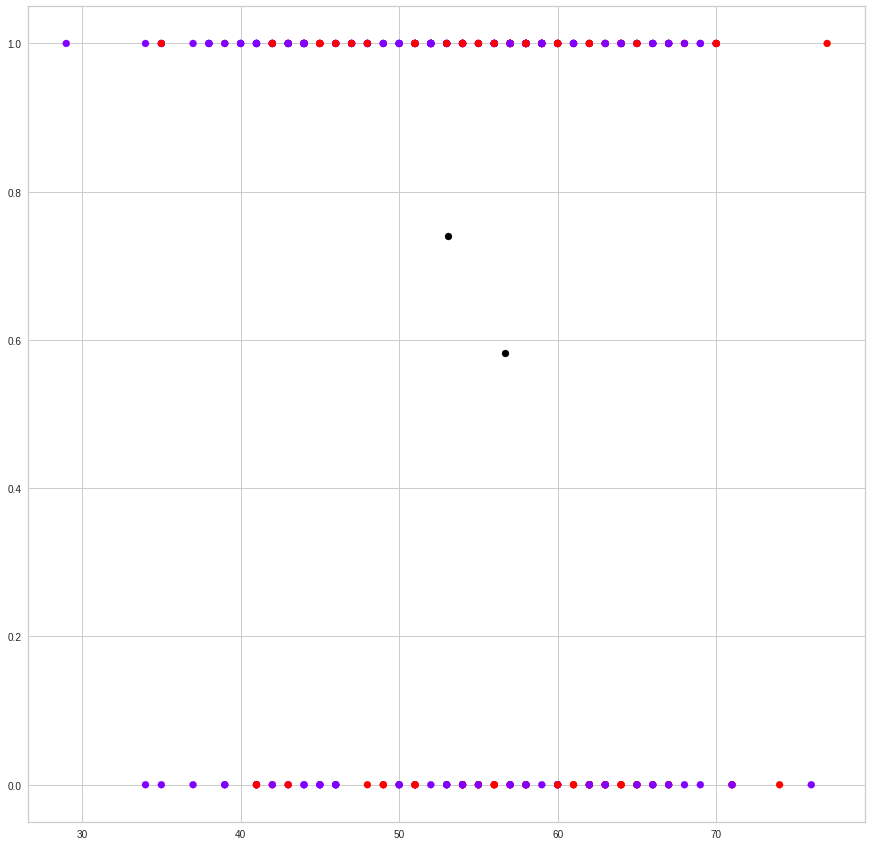

In [59]:
plt.figure(1,figsize=(15,15))
plt.scatter(df.age, df.sex, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')